## Final Project
### In order to solve this set of questions you will use the dataset in the relative directory ./tmdb_5000_movies.csv


### Open Your CSV file and print the first 10 rows in a good format ###

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
%matplotlib inline

In [510]:
data  = pd.read_csv("tmdb_5000_movies.csv" )

In [511]:
data.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.70,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.90,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.68,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.40,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861

##### Exploring data

In [512]:
data.shape

(4803, 20)

In [513]:
data.info()
#homepage,tagline,release_data, overview and runtime have NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Check if any NANs in your dataset and fill them with a good filer ###

In [514]:
data.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [515]:
"""
We can fill the datasets by many ways. depending on the way we see the data. the filling method always depend on the 
understanding of the columns variables
"""
# mean is not always the best solution, if there is any outliers, it will be misleading. 
#more suitable with symmetric data distribution
"""dataset.fillna(dataset.mean(), inplace = True) """

# median is a good solution with skewed data. but since we have categoricals variables I cannot use it
"""dataset.fillna(dataset.median(), inplace = True)"""

# also we can use linear interpolation to fill the nan data,
# in this code snippet it will change the nan with the most suitable number, to follow the direction of increasing.
"""dataset.interpolate(method ='linear', limit_direction ='forward')"""

"dataset.interpolate(method ='linear', limit_direction ='forward')"

In [516]:
data.interpolate(method ='linear', limit_direction ='forward')

C:\Users\GOOGLE\AppData\Local\Temp\ipykernel_17724\3042394971.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method ='linear', limit_direction ='forward')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.27,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.00,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.60,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.64,[],[],2011-12-26,0,85.00,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.90,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.44,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[

In [517]:
data.replace(np.nan , 0 , inplace = True)

In [518]:
data.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Discover the types of each columns and modify them if needed ###

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [520]:
#Date, runtime Dtype shall be changed 
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [521]:
data['runtime'] = data['runtime'].astype(float, errors = 'raise')

In [522]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [523]:
data['release_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True) # to fill the NAT value with spaceholder date

C:\Users\GOOGLE\AppData\Local\Temp\ipykernel_17724\3301690435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['release_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True) # to fill the NAT value with spaceholder date


In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4803 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [525]:
data.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124


### Give a very simple statistical analsys for the numerical columns ###

In [526]:
pd.options.display.float_format = '{:.2f}'.format

In [527]:
stat = data.describe()
stat

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4803.00,4803.00,4803.00,4803,4803.00,4803.00,4803.00,4803.00
mean,29045039.88,57165.48,21.49,2002-12-20 03:48:09.444097664,82260638.65,106.83,6.09,690.22
min,0.00,5.00,0.00,1900-01-01 00:00:00,0.00,0.00,0.00,0.00
25%,790000.00,9014.50,4.67,1999-07-11 12:00:00,0.00,94.00,5.60,54.00
50%,15000000.00,14629.00,12.92,2005-10-01 00:00:00,19170001.00,103.00,6.20,235.00
75%,40000000.00,58610.50,28.31,2011-02-16 00:00:00,92917187.00,117.50,6.80,737.00
max,380000000.00,459488.00,875.58,2017-02-03 00:00:00,2787965087.00,338.00,10.00,13752.00
std,40722391.26,88694.61,31.82,NaN,162857100.94,22.71,1.19,1234.59


### Calculate the mean rate for [1999, 1980, 2004, 2017] the movies grouped by years ###

In [528]:
# Extract year
data['year'] = data['release_date'].dt.year

# Filter the DataFrame for the specified years
filtered_data = data[data['year'].isin([1999, 1980, 2004, 2017])]

# Group by 'year' and calculate the requested mean
mean_rate_by_year = filtered_data.groupby('year')['revenue'].mean()
mean_rate_by_year

year
1980   58681020.50
1999   60425385.43
2004   79797483.17
2017          0.00
Name: revenue, dtype: float64

### Rearange the dataframe based on revenue - budget values ###

In [529]:
# Calculate Profit which is revenue - budget values
data['profit'] = data['revenue'] - data['budget']

# Rearrange the DataFrame based on profit values
rearranged_data_by_profit = data.sort_values(by='profit', ascending=False)

rearranged_data_by_profit.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800,2009,2550965087
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.03,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.50,7562,1997,1645034188
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.71,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.50,8662,2015,1363528810
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.32,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.30,4176,2015,1316249360
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.45,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.40,11776,2012,1299557910


### Allocate the year with the largest movies released in ['Action', 'Romance'] ###

In [561]:
import pandas as pd
import ast
# this code to clean the nested json structure, as  the normlized function won't run if it wasn't clean 
# in addition, this function is to valid the value of any str , float, int as a readable data

def filter_sub_df(df: pd.DataFrame, col_with_sub_df, key_col: [int, str], valid_value):
	if isinstance(valid_value, (str, int, float)):
		valid_value = [valid_value]
	elif isinstance(valid_value, (list, tuple)):
		pass
	else:
		raise TypeError("valid_value param is invalid, valid signature is str, int, float, list.")
	return df[
		df[col_with_sub_df].apply(
			lambda x: isinstance(x, pd.DataFrame) and
			key_col in x.columns and
			any(i in x[key_col].values for i in valid_value))
	]
#Filttering the data 
df = pd.read_csv('tmdb_5000_movies.csv')
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: pd.DataFrame(x))
filtter = filter_sub_df(df, "genres", "name", "Action")
print(filtter)

         budget                                             genres  \
0     237000000      id             name
0   28           Actio...   
1     300000000     id       name
0  12  Adventure
1  14    Fan...   
2     245000000     id       name
0  28     Action
1  12  Adven...   
3     250000000     id      name
0  28    Action
1  80     Crim...   
4     260000000      id             name
0   28           Actio...   
...         ...                                                ...   
4734          0      id             name
0   53         Thrille...   
4769          0          id     name
0  28   Action
1  37  Western   
4772      31192     id    name
0  18   Drama
1  28  Action
2  3...   
4778          0     id      name
0  28    Action
1  18     Dram...   
4798     220000     id      name
0  28    Action
1  80     Crim...   

                                          homepage      id  \
0                      http://www.avatarmovie.com/   19995   
1     http://disney.go.com/disneypi

In [567]:
#1154 are action movies (Heaven's Gate)
largest_Action_movie = filtter.nlargest(1, 'runtime')
largest_Action_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1109,44000000,id name 0 28 Action 1 18 Drama 2...,NaN,10935,"[{""id"": 680, ""name"": ""montana""}, {""id"": 797, ""...",en,Heaven's Gate,Harvard graduate James Averill (Kris Kristoffe...,5.38,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1980-11-19,3484331,219.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The only thing greater than their passion for ...,Heaven's Gate,6.40,55


In [577]:
#Filttering the data 
#894 Romance movies (Cleopatra)
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: pd.DataFrame(x))
filtter_1 = filter_sub_df(df, "genres", "name", "Romance")
print(filtter_1)

         budget                                             genres  \
25    200000000        id      name
0     18     Drama
1  10749...   
49    105000000        id     name
0     18    Drama
1  10749  ...   
50    150000000        id       name
0     12  Adventure
1     ...   
81    180000000        id       name
0     14    Fantasy
1     ...   
83     27000000        id             name
0     28           A...   
...         ...                                                ...   
4781      22000        id     name
0     35   Comedy
1  10749  ...   
4784          0        id     name
0     18    Drama
1     35  ...   
4786          0        id     name
0     35   Comedy
1  10749  ...   
4799       9000        id     name
0     35   Comedy
1  10749  ...   
4800          0        id      name
0     35    Comedy
1     18...   

                                               homepage      id  \
25                          http://www.titanicmovie.com     597   
49                       

In [578]:
largest_Romance_movie = filtter_1.nlargest(1, 'runtime')
largest_Romance_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1125,31115000,id name 0 18 Drama 1 36 ...,NaN,8095,"[{""id"": 5049, ""name"": ""ancient rome""}, {""id"": ...",en,Cleopatra,Historical epic. The triumphs and tragedy of t...,13.24,"[{""name"": ""Twentieth Century Fox Film Corporat...",iso_3166_1 name 0 ...,1963-06-12,71000000,248.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The motion picture the world has been waiting ...,Cleopatra,6.70,146


### Find the movies with top 5 revenue - budget value ###

In [565]:
top_5_movies = data.nlargest(5, 'profit')
top_5_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800,2009,2550965087
25,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.03,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.50,7562,1997,1645034188
28,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.71,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.50,8662,2015,1363528810
44,190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.32,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.30,4176,2015,1316249360
16,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.45,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.40,11776,2012,1299557910


### Find the year with the highest number of movies release ###

In [536]:
data["year"].value_counts().sort_values(ascending=False) #2009

year
2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1900      1
1932      1
1916      1
1934      1
1925      1
Name: count, Length: 91, dtype: int64

### Find the top 2 countries with the highest production movies number ###

### Find the top 1 company with the highest production movies number ###



### Is there any relation between the runtime and average vote value ### **


C:\Users\GOOGLE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


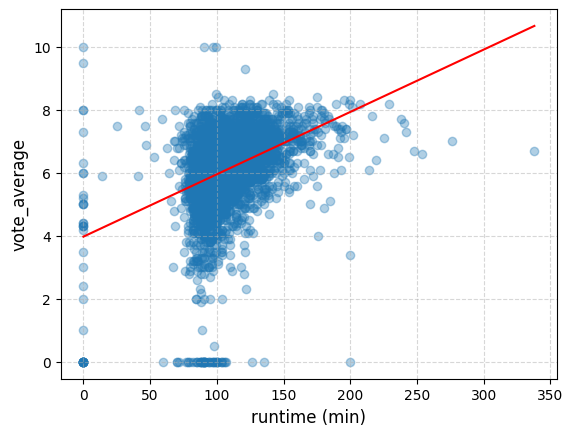

In [537]:

from sklearn.linear_model import LinearRegression

X=data[["runtime"]]
y=data['vote_average']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
bounds=[X.min(),X.max()]
y_pred = model.predict(bounds)

plt.scatter(X,y,alpha=0.35)
plt.plot(bounds,y_pred,color='r')

# Label axes
plt.xlabel("runtime (min)", fontsize=12)
plt.ylabel("vote_average", fontsize=12)

# Display grid
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Find the top 5 movies with the highest rate, and find if there anything common between them. ###



In [538]:
top_5_movies_rate = data.nlargest(5, 'vote_average')
top_5_movies_rate.head() #all have a genres of comedy 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",0,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.36,[],...,0,99.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,Stiff Upper Lips,10.00,1,1998,0
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",0,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.38,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.00,1,1998,565592
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",0,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.09,[],...,0,90.00,[],Released,"A story about second, second chances",Me You and Five Bucks,10.00,2,2015,-1
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",0,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.09,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,0,Little Big Top,10.00,1,2006,0
3992,0,[],0,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.30,[],...,0,0.00,[],Released,0,Sardaarji,9.50,2,2015,0


### Find the most unsuccessful movie along time in terms of revenue - budget ###



In [539]:
unsucc_movies =data.loc[data['profit'].idxmin()]
unsucc_movies #   The Lone Ranger

budget                                                          255000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                            http://disney.go.com/the-lone-ranger/
id                                                                  57201
keywords                [{"id": 1556, "name": "texas"}, {"id": 2673, "...
original_language                                                      en
original_title                                            The Lone Ranger
overview                The Texas Rangers chase down a gang of outlaws...
popularity                                                          49.05
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                          2013-07-03 00:00:00
revenue                                                          89289910
runtime                               

### Rearange the dataframe based on vote_average column values ###



In [540]:

# Rearrange the DataFrame based on vote_average values
rearranged_data_by_vote_average = data.sort_values(by='vote_average', ascending=False)

rearranged_data_by_vote_average.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",0,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.36,[],...,0,99.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,Stiff Upper Lips,10.00,1,1998,0
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",0,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.09,[],...,0,90.00,[],Released,"A story about second, second chances",Me You and Five Bucks,10.00,2,2015,-1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",0,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.38,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.00,1,1998,565592
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",0,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.09,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,0,Little Big Top,10.00,1,2006,0
3992,0,[],0,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.30,[],...,0,0.00,[],Released,0,Sardaarji,9.50,2,2015,0
2386,0,"[{""id"": 37, ""name"": ""Western""}, {""id"": 28, ""na...",0,69848,"[{""id"": 6091, ""name"": ""war""}, {""id"": 6092, ""na...",en,One Man's Hero,One Man's Hero tells the little-known story of...,0.91,"[{""name"": ""Filmax"", ""id"": 3631}, {""name"": ""Sil...",...,0,121.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One man's hero is another man's traitor.,One Man's Hero,9.30,2,1999,0
2970,10500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",0,88641,[],en,There Goes My Baby,A group of high school seniors meets in the su...,0.04,"[{""name"": ""Nelson Entertainment"", ""id"": 365}]",...,123509,99.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,There Goes My Baby,8.50,2,1994,-10376491
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",0,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.75,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,28341469,142.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.50,8205,1994,3341469
2796,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",0,43867,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 25...",en,The Prisoner of Zenda,An Englishman on a Ruritarian holiday must imp...,4.02,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,0,101.00,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,The most thrilling swordfight ever filmed...,The Prisoner of Zenda,8.40,11,1937,0
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.66,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,245066411,175.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.40,5893,1972,239066411


### Rearange the dataframe based on runtime column values ###



In [541]:
# Rearrange the DataFrame based on runtime values
rearranged_data_by_runtime = data.sort_values(by='runtime', ascending=False)

rearranged_data_by_runtime.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",0,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.14,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,871279,338.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.70,50,2010,-17128721
2631,0,"[{""id"": 18, ""name"": ""Drama""}]",0,112430,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Company,Real-life figures from the Cold War era mix wi...,1.49,[],...,0,276.00,[],Released,0,The Company,7.00,12,2007,0
1922,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",0,10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Gettysburg,Summer 1863. The Confederacy pushes north into...,5.53,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...",...,25000000,254.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,Gettysburg,6.60,90,1993,25000000
1125,31115000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",0,8095,"[{""id"": 5049, ""name"": ""ancient rome""}, {""id"": ...",en,Cleopatra,Historical epic. The triumphs and tragedy of t...,13.24,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,71000000,248.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The motion picture the world has been waiting ...,Cleopatra,6.70,146,1963,39885000
2373,0,"[{""id"": 18, ""name"": ""Drama""}]",0,10549,"[{""id"": 456, ""name"": ""mother""}, {""id"": 497, ""n...",en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.81,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...",...,0,242.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,Hamlet,7.30,117,1996,0
3510,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",0,183894,[],en,Emma,"Emma Woodhouse seems to be perfectly content, ...",2.14,[],...,0,240.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,0,Emma,7.60,38,2009,0
3813,4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",0,770,"[{""id"": 314, ""name"": ""life and death""}, {""id"":...",en,Gone with the Wind,An American classic in which a manipulative wo...,48.98,"[{""name"": ""Selznick International Pictures"", ""...",...,400176459,238.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The greatest romance of all time!,Gone with the Wind,7.70,970,1939,396176459
1663,30000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",0,311,"[{""id"": 314, ""name"": ""life and death""}, {""id"":...",en,Once Upon a Time in America,A former Prohibition-era Jewish gangster retur...,49.34,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,0,229.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Crime, passion and lust for power - Sergio Leo...",Once Upon a Time in America,8.20,1069,1984,-30000000
4497,600000,"[{""id"": 36, ""name"": ""History""}, {""id"": 99, ""na...",0,9459,"[{""id"": 458, ""name"": ""hippie""}, {""id"": 460, ""n...",en,Woodstock,An intimate look at the Woodstock Music & Art ...,3.41,"[{""name"": ""Wadleigh-Maurice"", ""id"": 3816}, {""n...",...,34505110,225.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"3 days of peace, music...and love.",Woodstock,7.10,66,1970,33905110
1109,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",0,10935,"[{""id"": 680, ""name"": ""montana""}, {""id"": 797, ""...",en,Heaven's Gate,Harvard graduate James Averill (Kris Kristoffe...,5.38,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,3484331,219.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The only thing greater than their passion for ...,Heaven's Gate,6

### Find the top 5 successful years for the USA cinema based on the total income devided by number of movies  ###



### Find the most succesfull movie in [USA, UK] ###



### In your opinion what is the highest variable that affects the revenue value (high coloration) ### PONUS



In [542]:
# Rearrange the DataFrame based on revenue values
rearranged_data_by_revenue = data.sort_values(by='revenue', ascending=False)

rearranged_data_by_revenue.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800,2009,2550965087
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.03,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.50,7562,1997,1645034188
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.45,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.40,11776,2012,1299557910
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.71,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.50,8662,2015,1363528810
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.32,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.30,4176,2015,1316249360
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.28,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,1405403694,141.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.30,6767,2015,1125403694
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.13,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1274219009,102.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.30,5295,2013,1124219009
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.68,"[{""name"": ""Marvel Studios"", ""id"": 420}]",...,1215439994,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Unleash the power behind the armor.,Iron Man 3,6.80,8806,2013,1015439994
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minio

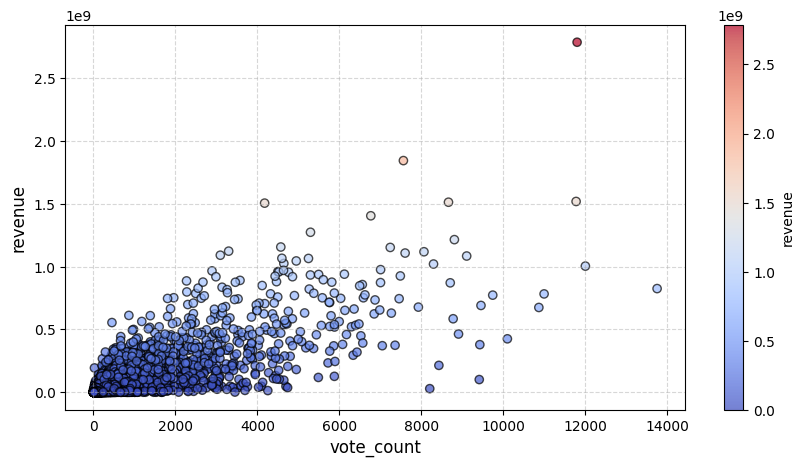

In [543]:
plt.figure(figsize=(10,5))

plt.scatter(data["vote_count"],data["revenue"],c=data["revenue"],cmap="coolwarm", edgecolors="k", alpha=0.7)

# Label axes
plt.xlabel("vote_count", fontsize=12)
plt.ylabel("revenue", fontsize=12)

# Add color legend
plt.colorbar(label="revenue")

# Display grid
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

In [544]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'year', 'profit'],
      dtype='object')

## Good Luck